In [1]:
!pip install gpflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.9/392.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 6.6 MB/s eta 0:00:00


In [2]:
import gpflow
import sklearn
from sklearn.linear_model import Ridge
from gpflow.kernels import Matern52 # non-linear standard kernel
from gpflow.models import GPR # IMPORT gaussian process regression function
from gpflow.optimizers import Scipy # import model optimizer function
import pandas as pd
import numpy as np

In [ ]:
phenotype = pd.read_csv("CFS_Samples_UK_with_mtVLM.csv")
APOGEE_UK_Fatigue = pd.read_csv("results (3).csv")
Patient_split = [f'CFS{i.split("_")[3]}' for i in APOGEE_UK_Fatigue['Patient']]

APOGEE_UK_Fatigue['Patient']=Patient_split

# Merge fatigue data with APOGEE variant load scores
df=pd.merge(APOGEE_UK_Fatigue,phenotype,left_on="Patient",right_on="Patient")
[i for i in df.columns]

['Patient',
 'Variant Load Score',
 'Haplogroup',
 'Pathogenic_Variant0',
 'Pathogenic_Variant1',
 'Pathogenic_Variant2',
 'Pathogenic_Variant3',
 'Pathogenic_Variant4',
 'Pathogenic_Variant5',
 'Pathogenic_Variant6',
 'Pathogenic_Variant7',
 'Pathogenic_Variant8',
 'Pathogenic_Variant9',
 'Pathogenic_Variant10',
 'Pathogenic_Variant11',
 'Pathogenic_Variant12',
 'Pathogenic_Variant13',
 'Pathogenic_Variant14',
 'Pathogenic_Variant15',
 'Pathogenic_Variant16',
 'Pathogenic_Variant17',
 'Pathogenic_Variant18',
 'Pathogenic_Variant19',
 'Pathogenic_Variant20',
 'Pathogenic_Variant21',
 'Pathogenic_Variant22',
 'Pathogenic_Variant23',
 'Pathogenic_Variant24',
 'Pathogenic_Variant25',
 'Pathogenic_Variant26',
 'Pathogenic_Variant27',
 'Pathogenic_Variant28',
 'Pathogenic_Variant29',
 'Pathogenic_Variant30',
 'Pathogenic_Variant31',
 'Pathogenic_Variant32',
 'Pathogenic_Variant33',
 'Pathogenic_Variant34',
 'Pathogenic_Variant35',
 'Pathogenic_Variant36',
 'Pathogenic_Variant37',
 'Pathogen

In [ ]:
# Import Fatigue UK APOGEE results and phenotypes
phenotype = pd.read_csv("CFS_Samples_UK_with_mtVLM.csv")
APOGEE_UK_Fatigue = pd.read_csv("results (3).csv") #
Patient_split = [f'CFS{i.split("_")[3]}' for i in APOGEE_UK_Fatigue['Patient']]

APOGEE_UK_Fatigue['Patient']=Patient_split

# Merge fatigue data with APOGEE variant load scores
df=pd.merge(APOGEE_UK_Fatigue,phenotype,left_on="Patient",right_on="Patient")
df=df.loc[:,['Patient','Variant Load Score','SF-36','Self efficacy','Trail B','TRACKING B','FIS']]
print(df.head(5)) ; df.loc[:,'Variant Load Score':].corr(method='pearson')

  Patient  Variant Load Score  SF-36  Self efficacy  Trail B  TRACKING B  \
0  CFS046            0.231240   27.0           28.0     69.0         NaN   
1  CFS024            0.097675   12.0           19.0     52.0         NaN   
2  CFS020            0.231240   15.0            7.0    121.0        75.0   
3  CFS027            0.096376   24.0           42.0     94.0         NaN   
4  CFS022            0.604001   10.0           13.0     98.0        98.0   

     FIS  
0   65.0  
1    NaN  
2  137.0  
3   83.0  
4  135.0  


,Variant Load Score,SF-36,Self efficacy,Trail B,TRACKING B,FIS
Variant Load Score,1.000000,-0.346451,-0.267402,0.347848,0.295398,0.234133
SF-36,-0.346451,1.000000,0.699832,-0.212217,-0.706240,-0.704825
Self efficacy,-0.267402,0.699832,1.000000,-0.418242,-0.589548,-0.787781
Trail B,0.347848,-0.212217,-0.418242,1.000000,0.793169,0.211361
TRACKING B,0.295398,-0.706240,-0.589548,0.793169,1.000000,0.508532
FIS,0.234133,-0.704825,-0.787781,0.211361,0.508532,1.000000


In [ ]:
# First run basic linear ridge regression for SF-36
clf = Ridge(alpha=1.0)
clf.fit(df['Variant Load Score'].values.reshape(-1,1), df['SF-36'].values.reshape(-1,1))
train_predict=clf.predict(df['Variant Load Score'].values.reshape(-1,1)) # training r value
from sklearn.metrics import r2_score
print(f'Train R2 score SF-36 : {r2_score(df["SF-36"].values.reshape(-1,1), train_predict)}')  # training correlation 0.1187 meaning fitted model accounts for 12% variation in the data points


Train R2 score SF-36 : 0.11876287550866238


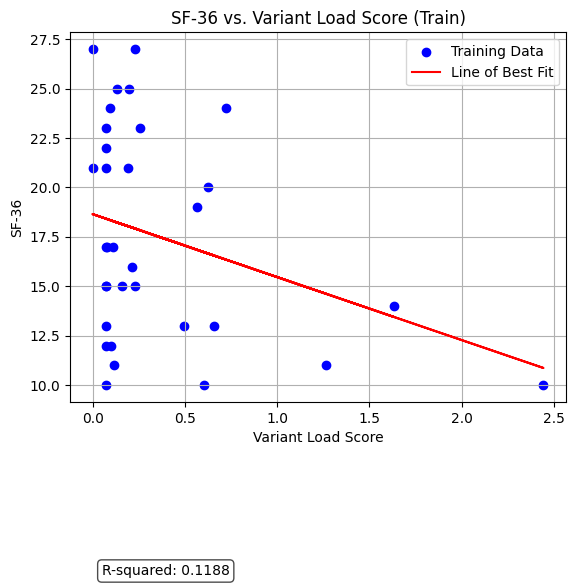

Train R2 score SF-36 : 0.1188


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

X = df['Variant Load Score'].values.reshape(-1, 1)
y = df['SF-36'].values
train_predict = clf.predict(X)
r2 = r2_score(y, train_predict)
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X, train_predict, color='red', label='Line of Best Fit')
plt.xlabel('Variant Load Score')
plt.ylabel('SF-36')
plt.title('SF-36 vs. Variant Load Score (Train)')
plt.text(0.05, 0.95, f'R-squared: {r2:.4f}', ha='left', va='top', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
plt.legend()
plt.grid(True)
plt.show()
print(f'Train R2 score SF-36 : {r2:.4f}')  # Adjusted for clarity with 4 decimal places


In [ ]:
clf = Ridge(alpha=1.0)
df=df.loc[:,'Variant Load Score':'FIS'].fillna(0)
clf.fit(df['Variant Load Score'].values.reshape(-1,1), df['FIS'].values.reshape(-1,1))
train_predict=clf.predict(df['Variant Load Score'].values.reshape(-1,1)) # training r value
from sklearn.metrics import r2_score
print(f'Train R2 score FIS : {r2_score(df["FIS"].values.reshape(-1,1),train_predict)}')  # training correlation 0.1187 meaning fitted model accounts for 12% variation in the data points

# Log transformed FIS
clf = Ridge(alpha=1.0)
df=df.loc[:,'Variant Load Score':'FIS'][df['FIS']>0] # drop any patients with 0 FIS score. Can't use 0 in log transformation
clf.fit(df['Variant Load Score'].values.reshape(-1,1), np.log(df['FIS'].values.reshape(-1,1)))
train_predict=clf.predict(df['Variant Load Score'].values.reshape(-1,1)) # training r value
from sklearn.metrics import r2_score
print(f'Train R2 score log scaled FIS : {r2_score(df.loc[:,"FIS"][df["FIS"]>0].values.reshape(-1,1),train_predict)}')  # training correlation 0.1187 meaning fitted model accounts for 12% variation in the data points



Train R2 score FIS : 0.05422406175338901
Train R2 score log scaled FIS : -6.772860263786441


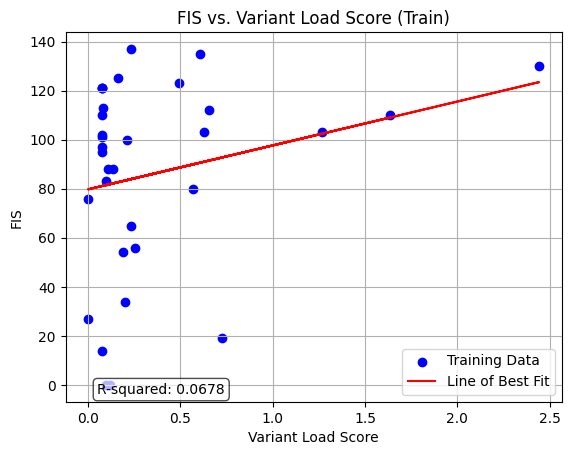

Train R2 score FIS : 0.0678


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

X = df['Variant Load Score'].values.reshape(-1, 1)
y = df['FIS'].values
train_predict = clf.predict(X)
r2 = r2_score(y, train_predict)
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X, train_predict, color='red', label='Line of Best Fit')
plt.xlabel('Variant Load Score')
plt.ylabel('FIS')
plt.title('FIS vs. Variant Load Score (Train)')
plt.text(0.05, 0.95, f'R-squared: {r2:.4f}', ha='left', va='top', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
plt.legend()
plt.grid(True)
plt.show()
print(f'Train R2 score FIS : {r2:.4f}')  # Adjusted for clarity with 4 decimal places


In [14]:
# Import Fatigue UK APOGEE results >cut off 0.265 and phenotypes

phenotype = pd.read_csv("CFS_Samples_UK_with_mtVLM.csv")
APOGEE_UK_Fatigue = pd.read_csv("results (3)_0.2.csv") #
Patient_split = [f'CFS{i.split("_")[3]}' for i in APOGEE_UK_Fatigue['Patient']]

APOGEE_UK_Fatigue['Patient']=Patient_split

# Merge fatigue data with APOGEE variant load scores
df=pd.merge(APOGEE_UK_Fatigue,phenotype,left_on="Patient",right_on="Patient")
df=df.loc[:,['Patient','Variant Load Score','SF-36','Self efficacy','Trail B','TRACKING B','FIS']]
print(df.head(5)) ; df.loc[:,'Variant Load Score':].corr(method='pearson')

  Patient  Variant Load Score  SF-36  Self efficacy  Trail B  TRACKING B  \
0  CFS046                 0.0   27.0           28.0     69.0         NaN   
1  CFS024                 0.0   12.0           19.0     52.0         NaN   
2  CFS020                 0.0   15.0            7.0    121.0        75.0   
3  CFS027                 0.0   24.0           42.0     94.0         NaN   
4  CFS022                 0.0   10.0           13.0     98.0        98.0   

     FIS  
0   65.0  
1    NaN  
2  137.0  
3   83.0  
4  135.0  


,Patient,Variant Load Score,SF-36,Self efficacy,Trail B,TRACKING B,FIS
0,CFS046,0.000000,27.0,28.0,69.0,NaN,65.0
1,CFS024,0.000000,12.0,19.0,52.0,NaN,NaN
2,CFS020,0.000000,15.0,7.0,121.0,75.0,137.0
3,CFS027,0.000000,24.0,42.0,94.0,NaN,83.0
4,CFS022,0.000000,10.0,13.0,98.0,98.0,135.0
5,CFS036,0.000000,25.0,40.0,76.0,NaN,34.0
6,CFS038,0.000000,24.0,51.0,35.0,45.0,19.0
7,CFS025,0.000000,22.0,56.0,117.0,NaN,14.0
8,CFS028,0.000000,23.0,24.0,NaN,NaN,121.0
9,CFS033,0.000000,25.0,44.0,66.0,53.0,88.0


In [16]:
# Logistic regression/ classifier

# USE RESULTS DATASET WITH CUT-OFF >0.265. Set any patients with mtVLM score 0 as 0 class and any patients above 0 as 1 class

# FIS LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
 # NEED TO CONVERT FIS INTO CATEGORICAL GROUPS
 # Classifier model would benefit from patients without fatigue as they may have lower mtVLM scores than patients that have fatigue????
df=df.loc[:,'Variant Load Score':'FIS'].fillna(0)
df.to_csv("FIS_merged_phenotype.csv")
df['FIS']=[1 if i>0 else 0 for i in df['Variant Load Score'].values]
clf = LogisticRegression(random_state=42).fit(df['Variant Load Score'].values.reshape(-1,1), df['FIS'].values.reshape(-1,1))
clf.predict(df['Variant Load Score'].values.reshape(-1,1))
clf.predict_proba(df['Variant Load Score'].values.reshape(-1,1))
#clf.score()
print(f"Number of yes classes: {len(df[df['FIS']==0])}")
print(f"Number of no classes: {len(df[df['FIS']==1])}")
df

Number of yes classes: 29
Number of no classes: 4


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Variant Load Score,SF-36,Self efficacy,Trail B,TRACKING B,FIS
0,0.000000,27.0,28.0,69.0,0.0,0
1,0.000000,12.0,19.0,52.0,0.0,0
2,0.000000,15.0,7.0,121.0,75.0,0
3,0.000000,24.0,42.0,94.0,0.0,0
4,0.000000,10.0,13.0,98.0,98.0,0
5,0.000000,25.0,40.0,76.0,0.0,0
6,0.000000,24.0,51.0,35.0,45.0,0
7,0.000000,22.0,56.0,117.0,0.0,0
8,0.000000,23.0,24.0,0.0,0.0,0
9,0.000000,25.0,44.0,66.0,53.0,0


In [ ]:
# SF36 LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
 # NEED TO CONVERT FIS INTO CATEGORICAL GROUPS
 # Classifier model would benefit from patients without fatigue as they may have lower mtVLM scores than patients that have fatigue????
df=df.loc[:,'Variant Load Score':'SF-36'].fillna(0)
df.to_csv("SF36_merged_phenotype.csv")
df['SF-36']=[1 if i>0 else 0 for i in df['SF-36'].values]
clf = LogisticRegression(random_state=42).fit(df['Variant Load Score'].values.reshape(-1,1), df['SF-36'].values.reshape(-1,1))
clf.predict(df['Variant Load Score'].values.reshape(-1,1))
clf.predict_proba(df['Variant Load Score'].values.reshape(-1,1))
#clf.score()
print(f"Number of yes classes: {len(df[df['SF-36']==0])}")
print(f"Number of no classes: {len(df[df['SF-36']==1])}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1